# Introduction tutorial to Deep Learning

In this excercise, you will implement a 1-layer fully connected network to map images of digits to their numerical value.
The questions appear in increasing difficulty levels.
 
A fully connected layer is essentialy similar to linear regression, where we find weights (w) that by multiplying the input will output the expected prediction.
Below is an example of one fully connected layer:
<div>
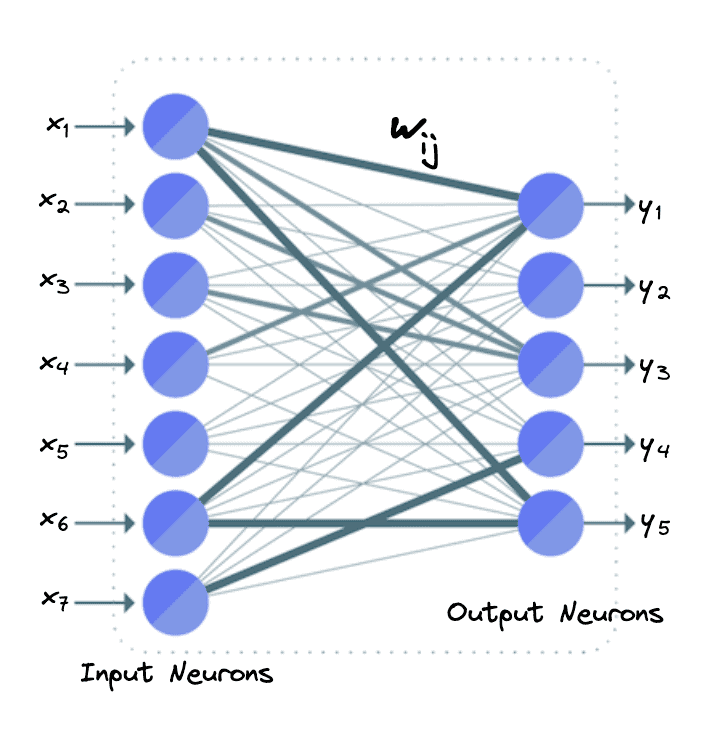
    <div align="right">
    <i>image credit <a href=https://www.baeldung.com/cs/neural-networks-conv-fc-layers>https://www.baeldung.com/cs/neural-networks-conv-fc-layers</a></i></div>
</div>

In the image above:
- the input layer would be the feature we have in our data $(x_i)$
- the output layer represent a linear combination of the input features. each node represent a new feature we can generate from the given features.  $(y_i)$
- the edges are the weights of the linear combination. Observe that each node in the output layer is a different combintaion of the input features. (Each node is connected with some weights to all of the input's node. hence the name "fully connected").

Another way to represent this is refering to the weights as matrix W and so we get: $Y=W*X$.


You might ask yourself what makes Neural Network so speciel? One of the answer is the use of non-linear layer between linear layers. Meaning that instead of just calculating $W*X$ we calculate $f(W*X)$ where $f$ is a non-linear function. The most commonly used non-linear functions are: tanh, sigmoid, relu, etc.

The <i>"Deep learning"</i> part comes from stacking multiple linear layers with non-linear function in-between. Note that stacking only linear layers without non-linear function in between is equal to one linear layer. ($Y=W_n*...*W_1*X=W*X$).

More layers &rarr; Deeper the network &rarr; More complex feature the netwrok can learn.  


<div>
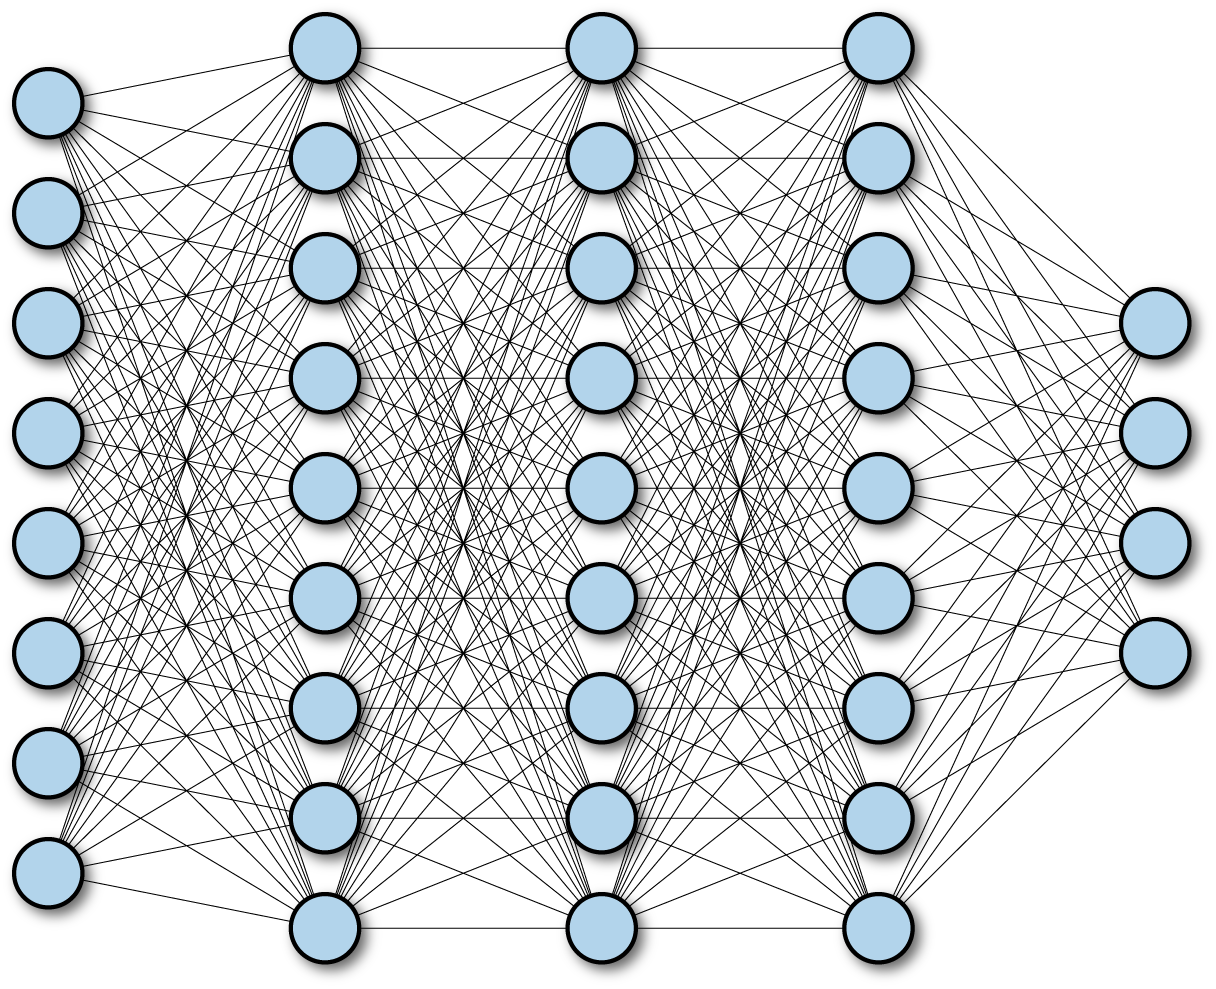
    <div align="right">
    <i>image credit <a href=https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/ch04.html>https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/ch04.html</a></i></div>
</div>


<b>But</b> how do we find those weights (W)?
We use a labeled dataset to train an optimization problem where we try to minimize some loss function. The loss function will be a function of the weights and the ground truth labels.

$Loss(f_W(X), GT)$ where $X$ - input features, $f_W(X)$ - the output of the network, $GT$ - the ground truth

Usually we solve this with some gradient descent based approch, for example: SGD, Adam and more.

In this tutorial you will learn how to classify digits based on the their images with a small neural network. We will use pytorch to implement and train the model and you will be guided through all the steps of the optamization problem.

## Here are some few useful links:

* <a href=https://medium.com/@sadafsaleem5815/neural-networks-in-10mins-simply-explained-9ec2ad9ea815> Blog post on neural networks </a>

* A pytorch guide for basic model - https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html. Very similar to this tutorial. Highly recommended to go over if you struggle.

* Some short data science courses, including intro to Python and Machine learning, can be found on Kaggle

* Link to HPC\AI hub wiki: https://hpcwiki.weizmann.ac.il/en/home/ai_hub

* Link to our WEXAC Jupiter hub (you'll need a WEXAC user): https://access.wexac.weizmann.ac.il:8000/hub/login (choose the GPU option for deep learning tutorials)

* Define the aihub_env enviroment in the Jupiter hub, follow the wiki instuctions: https://hpcwiki.weizmann.ac.il/en/home/ai_hub#h-31-opening-a-jupiter-hub-session-and-setting-the-conda-environment-aihub_env 

* PyTorch, a deep learning framework which we will use for the coding exercises. For additional information, you can see the lecture from DL4CV (Deep Learning for Computer Vision) course Introduction to PyTorch 2021: https://www.youtube.com/watch?v=hQf6vvn6LGo or Pytorch getting started: https://pytorch.org/tutorials/beginner/basics/intro.html

## The Excercise
Follow the instructions in the following boxes
Lines that contain "pass" commands and variables set to "None" should be replaced by your answers

### Part 1: Imports, loading MNIST data, data loaders

In the following cell you will add the needed imports.

In [ ]:
# Question 1  : Write import statements for:
#          1.1: the "torch" module
#          1.2: the "torchvision.transforms" module (name it "transforms")
#          1.3: the "MNIST" class of the "torchvision.datasets" module
#          1.4: the class used for loading data into neural networks in "PyTorch" (dataloader)

pass  # REPLACE

In [ ]:
# Question 2.1: check for cuda (GPU usage) availability
pass  # REPLACE

# Question 2.2: define the device ("torch.device" class instance) used for storing training data and models
# Requirements: device type should depend on cuda availability!
pass  # REPLACE

# Optional: memory pinning is a technical detail related to working with GPU - recommended parameter for dataloader
#pin_memory_flag: bool = device.type == 'cuda'

True


In the following cell you will load the MNIST dataset. 
* MNIST is a labeled data consisting pairs of drawn digits and their numerical value.

First, you will create a Dataset obejct using "torchvision.datasets" for training and validating. This object will hold the data for training and validating the model.

In [ ]:
# Question 3.1: load the MNIST dataset using the "MNIST"
# Requirements: Create a train and validation datasets and make sure they are distinct
#               When initializing an instance of "MNIST":
#               Set the directory to which the data is downloaded to to be './root'
#               Set the "transform" argument to be the "dataset_transform" callable
#               Create training and validation sets using the "train" argument
#               Use the "dataset_transform" callable to resize all images be 16X16 pixels


dataset_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

root = None
train_dataset = None
val_dataset = None

In [ ]:
# Question 3.2: Check if the data transform works:
img, label = train_dataset[0]
img_resized = dataset_transform(img.numpy()[0])
img_resized.shape

In the following cell you will define our model:

In [ ]:
# Question 4.1: Define a linear model:
# Requirements: define a class that inherits from torch.nn.Module
#               construct a model with 1 fully connected layer
class NeuralNetwork(torch.nn.Module):
    def __init__(self, image_num_pix: int, num_classes: int):
        """
        Parameters
        ----------
        image_num_pix : number of pixels in image
        num_classes   : number of classes
        """

        # Initialize as any other torch.nn.Module
        super(NeuralNetwork, self).__init__()
        # Define attributes
        # Technical overhead: Save number of pixels to reshape images into vectors
        self.in_features = image_num_pix
        # Define the fully connected layer
        self.lyr1 = None

    def forward(self, img: torch.Tensor) -> torch.Tensor:
        # Technical overhead: Used to reshape to avoid RuntimeError when processing 2D data
        img_1 = torch.reshape(img, (img.shape[0], self.in_features))
        # Calculate forward pass using reshape image ("img_1") as input
        output = None
        return output


# Parameters
num_classes = 10
# Question 4.2: Construct model
image_num_pix = None
model = NeuralNetwork(image_num_pix=image_num_pix, num_classes=num_classes)
# Question 4.3: move model to device
model = model.to(device=device)

In the following cell you will define the loss and optimizer.
The loss function defines the "distance" between the model's prediction and the ground truth. Our task it to minimize this "distance". 

The optimizer is the method in which we minimize the loss function. For example, SGD will change the weights of the model in the direction of the graidents of the loss. Such that the weights will minimize the loss.

In [ ]:
# Question 5.1: define optimizer and loss
# Requirements: optimizer should be Adam, loss should be cross entropy
#               both should be callables. implementations are available in PyTorch and can be used here, like we did with "MNIST"
#               set the optimizer's learning rate to be 1e-3
optimizer = None
criterion = None

In the following cell you will create a DataLoader object. This object will allow you to iterate over the Dataset object you created, batch by bacth. (Because usually when training you will optimize your model one-by-one on each batch of the data.)

In [ ]:
# Question 6.1: Create 2 Instances of the class mentioned in Q1.4 for loading the training and validation data in batches
# Requirements: set batch size to be 16
#               train and validation data should be shuffled during each epoch
#               set the pin_memory option to be the variable 'pin_memory_flag'
batch_size = None
train_loader = None
val_loader = None

In the next cell you will implement a visulizer of the network's predictions.
The function will get as an input the loader (which allows you to iterate over the data, batch by bacth using a for loop) and the model. Ofcourse we have yet to train the model so we dont expect to have correct prediction at this stage.
Below is an example:
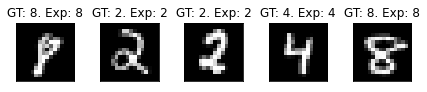

Training Set
Validation Set


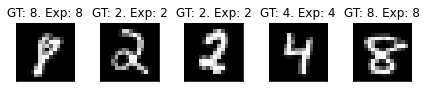

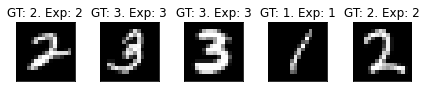

In [ ]:
# Question 7.1: Plot images, ground truths and predictions, use model.forward() for model evaluation
import matplotlib.pyplot as plt

def plot_example(loader,model, device, num_imgs=5):
  pass

pass

Now we can start training the model, follow the guidence and train the model.

In [ ]:
# Question 8.1: Write a training loop for 20 epochs (fill in what is missing)
#               Make sure gradients are not used during validation!
from tqdm import tqdm  # This is used for a fancy training progress bar

def train(model, train_loader, val_loader, optimizer, criterion, max_epochs=0, max_batches=5000):
  print("Start training")
  train_loss_list=[]
  val_loss_list=[]
  for epoch in tqdm(range(max_epochs)):
    print ("Epoch " + str(epoch + 1) + " out of " + str(max_epochs))
    # Train 1 Epoch
    train_loss_mean = train_one_epoch(
        model=model,
        train_loader=train_loader,
        optimizer=optimizer,
        criterion=criterion,
        max_batches=max_batches
        )
    # Add loss to list
    train_loss_list.append(train_loss_mean)
    # Validate 1 Epoch
    val_loss_mean = validate(
        model=model,
        val_loader=val_loader,
        criterion=criterion
        )
    # Add loss to list
    val_loss_list.append(val_loss_mean)
  print("End training")
  return train_loss_list, val_loss_list

def train_one_epoch(model, train_loader, optimizer, criterion, max_batches=5000):
  #  initialize average loss value
  train_loss_mean = 0
  # Loop over batches
  for batch_idx, batch in enumerate(train_loader):
    # Train 1 batch
    # organize batch to samples and tragets
    pass
    # zero the optimizer gradients
    pass
    # Forward pass
    pass
    # Calculate train loss
    pass
    # Back-propagation
    pass
    # optimizer step
    pass
    # aggregate loss
    train_loss_mean += None
    # Break early if exceeded max number of batches
    if batch_idx >= max_batches:
      break
  # Normalize loss
  train_loss_mean /= (batch_idx + 1)
    # Print loss:
  print ("Train loss:", train_loss_mean)
  return train_loss_mean

def validate(model, val_loader, criterion):
  #  initialize average loss value
  val_loss_mean = 0
  # Loop over batches
  for batch_idx, batch in enumerate(val_loader):
    # validate 1 batch
    # organize batch to samples and tragets
    pass
    # Forward pass
    pass
    # Calculate validation loss
    pass
    # aggregate loss
    val_loss_mean += None
  # Normalize loss
  val_loss_mean /= (batch_idx + 1)
  # Print loss:
  print ("Validation loss:", val_loss_mean)
  return val_loss_mean


# Training parameters
max_epochs = 10
max_batches = 5000
# # initialize list of losses vs. epochs

# Train model
train_loss_list_a, val_loss_list_a = train(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    max_epochs=max_epochs,
    max_batches=max_batches
    )

Start training
Epoch 1 out of 5
Training: 

5000it [00:07, 629.35it/s]


validating: 

5000it [00:04, 1065.64it/s]


Epoch 2 out of 5
Training: 

5000it [00:07, 633.37it/s]


validating: 

5000it [00:05, 992.32it/s] 


Epoch 3 out of 5
Training: 

5000it [00:07, 646.10it/s]


validating: 

5000it [00:04, 1122.43it/s]


Epoch 4 out of 5
Training: 

5000it [00:07, 644.58it/s]


validating: 

5000it [00:04, 1108.63it/s]


Epoch 5 out of 5
Training: 

5000it [00:08, 581.94it/s]


validating: 

5000it [00:04, 1102.11it/s]

End training


In [1]:
# Question 9.1: Plot training and validation losses
import matplotlib.pyplot as plt

pass

# Question 9.2: Use your code from question 7 to evaluate the model's performance
pass

In [ ]:
# Question 10.1: Write a new class "DeeperNeuralNetwork" that has 3 linear layers with input sizes: 
# image_num_pix, image_num_pix/2, num/classes*5, with 2 ReLU activation layes and one log_softmax in the end
# Question 10.2: define the model, train it and plot the loss for traning and validation, and the examples.
# Use the functions that you defined before with the same parameters, use different names for the outputs.
# Question 10.3: did the results improved?

## Questions
1. What is the effect of different number of epochs? different learning rate?

2. Look at the training progression as is printed to the screen. Which is faster (in terms of iterations / second): training or validation? Why is that the case?

3. What happens to the training time if we increase the images' size? What would happen if the "device" variable was set differently?

4. What is the risk of performig validation without disabling gradients?

5. How would you measure your model robustness to noise?

6. What are better models for the classification task given in this exercise?